### CDD questplus

Looking at the ADO portion done with questplus

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os,sys

In [5]:
#  'cdd_mean_alpha',
#  'cdd_mean_kappa',
#  'cdd_mean_gamma',
#  'cdd_sd_alpha',
#  'cdd_sd_kappa',
#  'cdd_sd_gamma',
#  'cdd_immed_amt_qp',
#  'cdd_delay_amt_qp',
#  'cdd_delay_wait_qp',    

def plot_param_estim(utlity_dir,idx,fn,df):
    def add_sd(df,xcol,ycol,ysd):
        upper_bound = df[ycol] + df[ysd]
        lower_bound = df[ycol] - df[ysd]
        plt.fill_between(df[xcol],lower_bound,upper_bound,alpha=0.2)

    subj = os.path.basename(fn).replace('_qp_cdd.csv','')
    plt.figure(idx)
    xcol = 'trial_nb'
    df[xcol] = [i for i in range(df.shape[0])]

    plt.subplot(211)
    ycol = 'cdd_mean_kappa'
    ysd = 'cdd_sd_kappa'
    ax = sns.lineplot(data=df,x=xcol,y=ycol)
    ax.set(xlabel=None,ylabel='kappa')
    ax.set(xticklabels=[])
    add_sd(df,xcol,ycol,ysd)
    plt.title(subj)

    plt.subplot(212)
    ycol = 'cdd_mean_gamma'
    ysd = 'cdd_sd_gamma'
    ax = sns.lineplot(data=df,x=xcol,y=ycol)
    ax.set(xlabel='trial #',ylabel='gamma')
    add_sd(df,xcol,ycol,ysd)

    plt.tight_layout()
    fig_fn = os.path.join(utility_dir,subj,'cdd/{}_cdd_qp_param_estimates.png'.format(subj))
    if not os.path.exists(os.path.dirname(fig_fn)):
        os.makedirs(os.path.dirname(fig_fn))
    print("Saving to: {}".format(fig_fn))
    plt.savefig(fig_fn)
    plt.show()


Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0150/cdd/23_IDM_ado_0150_cdd_qp_param_estimates.png


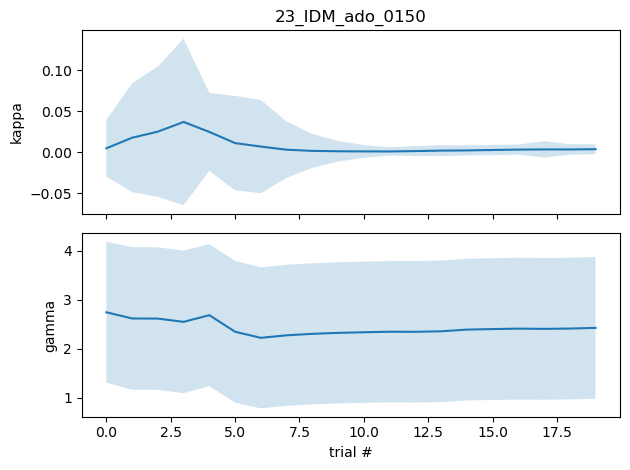

Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0151/cdd/23_IDM_ado_0151_cdd_qp_param_estimates.png


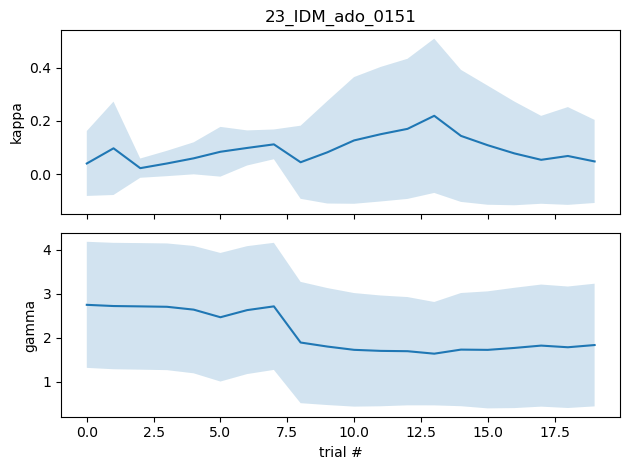

Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0152/cdd/23_IDM_ado_0152_cdd_qp_param_estimates.png


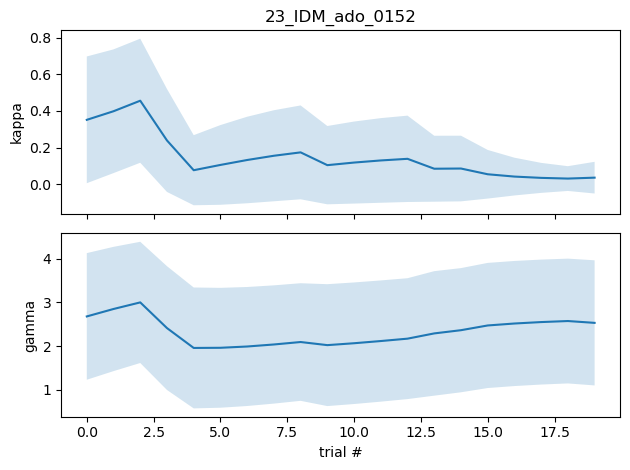

Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0153/cdd/23_IDM_ado_0153_cdd_qp_param_estimates.png


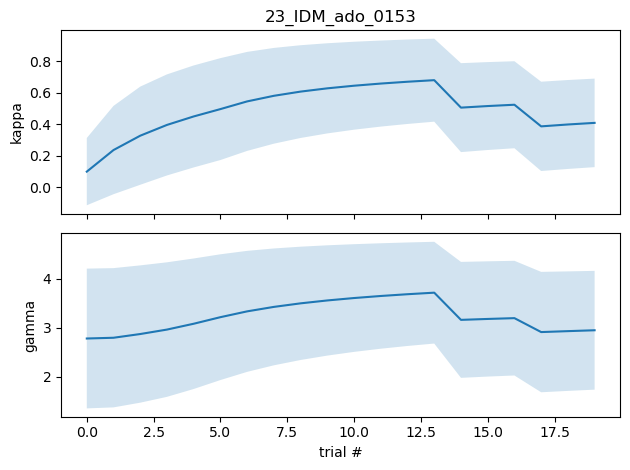

Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0154/cdd/23_IDM_ado_0154_cdd_qp_param_estimates.png


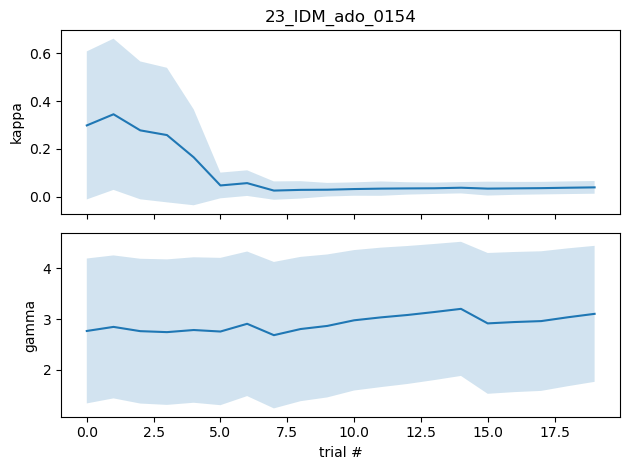

Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0155/cdd/23_IDM_ado_0155_cdd_qp_param_estimates.png


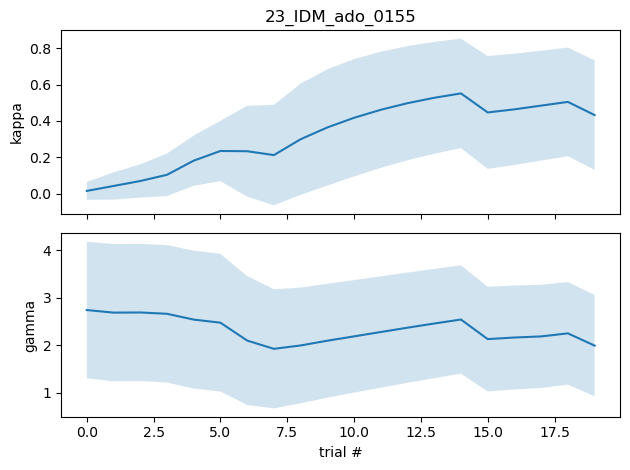

Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0156/cdd/23_IDM_ado_0156_cdd_qp_param_estimates.png


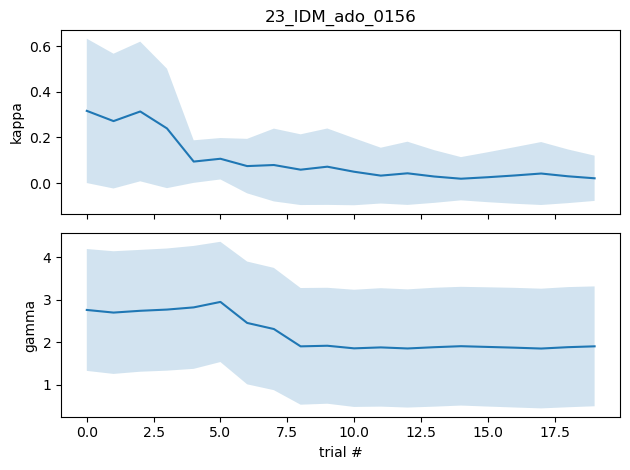

Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0157/cdd/23_IDM_ado_0157_cdd_qp_param_estimates.png


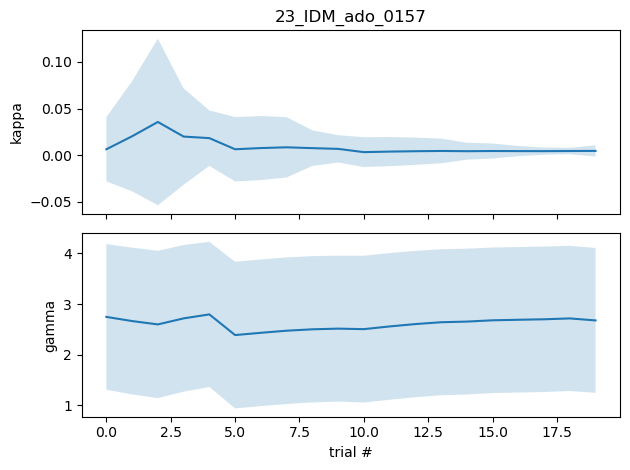

In [6]:
split_dir = '/Volumes/UCDN/datasets/IDM_ado/split_qp/'
utility_dir = '/Volumes/UCDN/datasets/IDM_ado/utility/'

cols = ['cdd_immed_wait','cdd_delay_amt','cdd_delay_wait','cdd_immed_amt']

#get set of all good data files for analysis
good_files = sorted(glob(os.path.join(split_dir, '*/cdd/*.csv')))
if (not good_files):
    print("No good files available. Check file path.")
    sys.exit()
for idx, subj_fn in enumerate(good_files):
    df = pd.read_csv(subj_fn)
    # display(df.head())
    # display(list(df))
    plot_param_estim(utility_dir,idx,subj_fn,df)
